<h1> User Engagement Analysis </h2>

<h2> Imporing data and packages </h2>

In [63]:
# importing libraries

import pandas as pd
import numpy as np
import os
import warnings
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Suppressing Warning messages

warnings.filterwarnings('ignore')

In [10]:
# setting folder and file paths

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) 
scripts_dir = os.path.join(parent_dir,"scripts") 
data_path = os.path.join(parent_dir,"data","teleco_user-aggr_data.csv")
sys.path.insert(1, scripts_dir)

In [11]:
# Importing data sumarizing function

from data_summarizing_functions import DataSummarizer as Sumar
sumar = Sumar()

In [12]:
# Importing data

user_df= pd.read_csv(data_path)

<h2> Users Exploration

<h3> Top 10 Users

In [13]:
# Showing the top 10 users in each of the following features

selected_features = ["xDr_session_count", "session_dur", "total_vol"]
sumar.show_N_per_col(user_df, "MSISDN/Number", selected_features , 10)


Top 10 customers based onxDr_session_count

       MSISDN/Number  xDr_session_count
13526   3.362632e+10                 18
13180   3.362578e+10                 17
6437    3.361489e+10                 17
37052   3.365973e+10                 16
76363   3.367588e+10                 15
92923   3.376054e+10                 15
65118   3.366716e+10                 13
92577   3.376041e+10                 12
1279    3.360452e+10                 12
666     3.360313e+10                 12

Top 10 customers based onsession_dur

        MSISDN/Number  session_dur
37052    3.365973e+10     1905.478
13526    3.362632e+10     1785.419
35436    3.365936e+10     1747.994
76363    3.367588e+10     1745.131
6437     3.361489e+10     1678.397
92923    3.376054e+10     1651.084
13180    3.362578e+10     1599.052
57241    3.366471e+10     1492.604
106137   3.378632e+10     1427.807
1648     3.360658e+10     1322.251

Top 10 customers based ontotal_vol

       MSISDN/Number    total_vol
6437    3.361489e+10

<h3> Creating Clusters

In [15]:
# Creating a new dataframe with selected features

selected_metrics1 = user_df[selected_features]

In [16]:
# Turning the dataframe into numpy array
temp_arr = selected_metrics1.loc[:, selected_features].values

# normalizing the features
temp_arr = StandardScaler().fit_transform(temp_arr) 

In [17]:
# Checking if normalization worked

np.mean(temp_arr), np.std(temp_arr), temp_arr.shape

(-1.5799295689207888e-16, 0.9999999999999998, (106856, 3))

In [20]:
# Converting the normalized array into a dataframe.

normalised_df = pd.DataFrame(temp_arr,columns=selected_features)
normalised_df.head()

,xDr_session_count,session_dur,total_vol
0,-0.481290,-0.116344,0.382392
1,-0.481290,0.519809,-1.087633
2,-0.481290,0.063615,-0.193382
3,-0.481290,-0.775493,-0.547016
4,0.753493,-0.901461,1.560970


In [22]:
# Creating Clusters

kmeans1 = KMeans(3)
kmeans1.fit(temp_arr)

KMeans(n_clusters=3)

In [23]:
# Generating cluster value for each row of the dataframe

identified_clusters = kmeans1.fit_predict(temp_arr)
identified_clusters

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
# Attaching the generated cluster values to the dataframe as a column

data_with_clusters = user_df.copy()
data_with_clusters['Clusters'] = identified_clusters 
sumar.summ_columns(data_with_clusters)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,MSISDN/Number,0,0.0,float64,106856
1,xDr_session_count,0,0.0,int64,18
2,session_dur,0,0.0,float64,74492
3,Handset,0,0.0,object,1394
4,Total_DL,0,0.0,float64,106851
5,Total_UL,0,0.0,float64,106715
6,total_vol,0,0.0,float64,106853
7,RTT total,0,0.0,float64,787
8,TP total,0,0.0,float64,28856
9,TCP total,0,0.0,float64,29986


In [31]:
clus_min_df = sumar.find_agg(data_with_clusters, "Clusters", ["xDr_session_count", "session_dur", "total_vol"], ["min", "min", "min"], ["xDr_min", "dur_min", "total_vol_min"])
clus_max_df = sumar.find_agg(data_with_clusters, "Clusters", ["xDr_session_count", "session_dur", "total_vol"], ["max", "max", "max"], ["xDr_max", "dur_max", "total_vol_max"])
clus_count_df = sumar.find_agg(data_with_clusters, "Clusters", ["xDr_session_count"], ["count"], ["Users_count"])
clus_mean_df = sumar.find_agg(data_with_clusters, "Clusters", ["xDr_session_count", "session_dur", "total_vol"], ["mean", "mean", "mean"], ["xDr_mean", "dur_mean", "total_vol_mean"])


In [36]:
# minimum values for each of the selected features per cluster

clus_min_df

,Clusters,xDr_min,dur_min,total_vol_min
0,0,1,18.235,166.910132
1,1,0,7.142,33.249009
2,2,3,85.554,661.851764


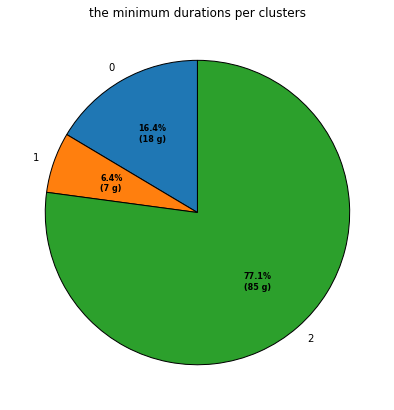

In [43]:
sumar.plot_pie(clus_min_df, ["Clusters", "dur_min"], "the minimum durations per clusters")

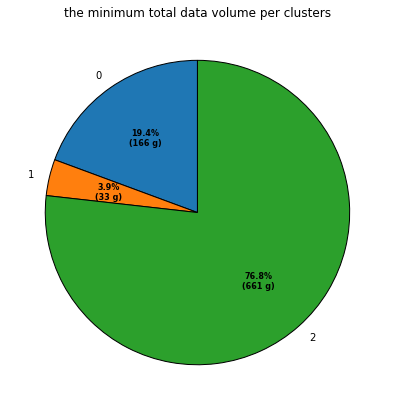

In [44]:
sumar.plot_pie(clus_min_df, ["Clusters", "total_vol_min"], "the minimum total data volume per clusters")

**Observations**
<ul>
    <li> the min value for xDr sessions is similar: 1</li>
    <li> cluster 2 has the largest min value for session duration and total volume used </li> 
</ul>

In [45]:
# maximum values for each of the selected features per cluster

clus_max_df

,Clusters,xDr_max,dur_max,total_vol_max
0,0,4,514.316,2509.056852
1,1,2,244.900,1541.899695
2,2,18,1905.478,8846.226494


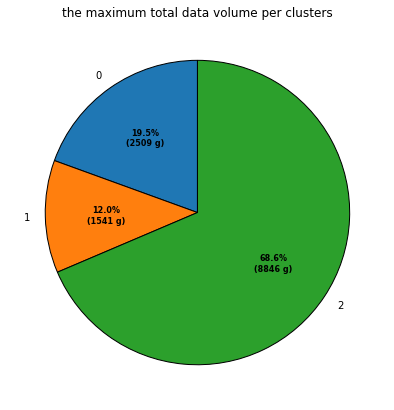

In [46]:
sumar.plot_pie(clus_max_df, ["Clusters", "total_vol_max"], "the maximum total data volume per clusters")

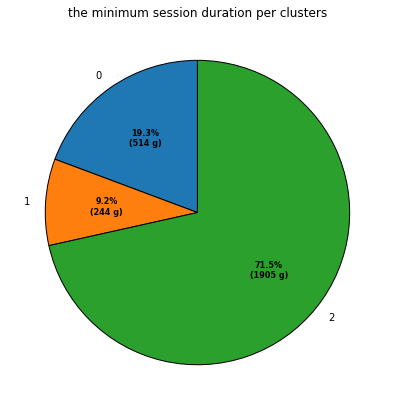

In [47]:
sumar.plot_pie(clus_max_df, ["Clusters", "dur_max"], "the minimum session duration per clusters")

**Observations**
<ul>
    <li> cluster 0 has larger max value for xDr session than cluster 1</li>
    <li> cluster 2 has the largest max (88.1%) value for xDr frequency, session duration and total volume used </li> 
</ul>

In [48]:
# Users count in each cluster.

clus_count_df

,Clusters,Users_count
0,0,22470
1,1,79985
2,2,4401


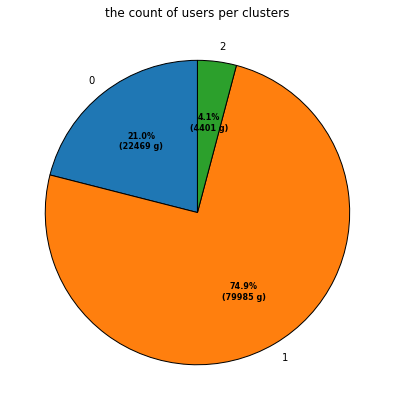

In [49]:
sumar.plot_pie(clus_count_df, ["Clusters", "Users_count"], "the count of users per clusters")

**Observation**

<li>cluster 1 has the largest number of users (74.7%)
<li>cluster 2 has the smallest number of users (3.3%)

In [50]:
# mean values for each of the selected features per cluster

clus_mean_df

,Clusters,xDr_mean,dur_mean,total_vol_mean
0,0,2.141745,193.442259,1089.820548
1,1,1.024717,93.237874,497.906356
2,2,4.185185,438.228870,2162.236481


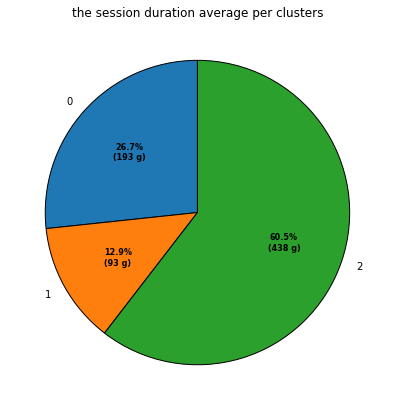

In [51]:
sumar.plot_pie(clus_mean_df, ["Clusters", "dur_mean"], "the session duration average per clusters")

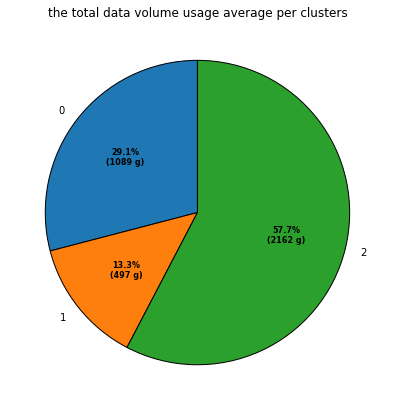

In [52]:
sumar.plot_pie(clus_mean_df, ["Clusters", "total_vol_mean"], "the total data volume usage average per clusters")

**Observation**
<li> again the mean data usage and duration of session is largest for cluster 2
<li> cluster 1 is the least engaged cluster in terms of session duration and total data volume


In [55]:
#lets get the center of the least engaged cluster

least_center = kmeans1.cluster_centers_[1]
least_center

array([-0.45065032, -0.34786485, -0.3930085 ])

In [57]:
# Calculating engagement score based on euclidean distance between 
# the least_center and the user data points within the selected features

normalised_df = sumar.calcScore(normalised_df, least_center, selected_features, "eng_score")  

In [58]:
# adding the engagement score to the non-normalized dataframe.

data_with_clusters["eng_score"] = normalised_df["eng_score"]
sumar.summ_columns(data_with_clusters)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,MSISDN/Number,0,0.0,float64,106856
1,xDr_session_count,0,0.0,int64,18
2,session_dur,0,0.0,float64,74492
3,Handset,0,0.0,object,1394
4,Total_DL,0,0.0,float64,106851
5,Total_UL,0,0.0,float64,106715
6,total_vol,0,0.0,float64,106853
7,RTT total,0,0.0,float64,787
8,TP total,0,0.0,float64,28856
9,TCP total,0,0.0,float64,29986


In [82]:
# checking the min and max of the eng_score

data_with_clusters["eng_score"].min(), data_with_clusters["eng_score"].max()

(0.030758713070875753, 30.812949229628344)

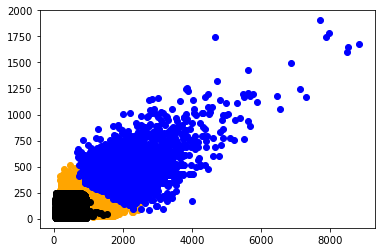

In [62]:
# 2-D plotting of the distribution between total_vol and session_dur
# filter rows of original data by clusters to plot them individually

filtered_label0 = data_with_clusters.loc[data_with_clusters["Clusters"] == 0] 
filtered_label1 = data_with_clusters.loc[data_with_clusters["Clusters"] == 1]
filtered_label2 = data_with_clusters.loc[data_with_clusters["Clusters"] == 2]
 
#Plotting the results
plt.scatter(filtered_label0.loc[:,"total_vol"] , filtered_label0.loc[:,"session_dur"] , color = 'orange')
plt.scatter(filtered_label1.loc[:,"total_vol"] , filtered_label1.loc[:,"session_dur"] , color = 'black')
plt.scatter(filtered_label2.loc[:,"total_vol"] , filtered_label2.loc[:,"session_dur"] , color = 'blue')

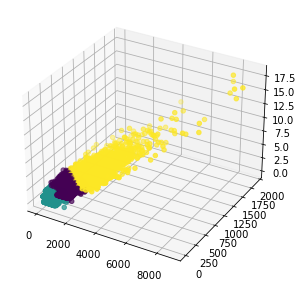

In [73]:
# 3-D plotting

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_with_clusters['total_vol'],data_with_clusters['session_dur'],data_with_clusters['xDr_session_count'], c =data_with_clusters['Clusters'])

**Observation**
<li> the three clusters are linearly separated as shown in the plot above.

In [77]:
# Top 10 most engaged users per application

sumar.show_N_per_col(data_with_clusters, "MSISDN/Number", ["youtube", "netflix", "gaming", "email", "google", "social"], 10)


Top 10 customers based onyoutube

       MSISDN/Number     youtube
13180   3.362578e+10  452.958769
92923   3.376054e+10  396.289198
6437    3.361489e+10  394.370218
13526   3.362632e+10  374.483047
76363   3.367588e+10  317.410572
65118   3.366716e+10  315.231310
13994   3.362708e+10  308.790774
92577   3.376041e+10  303.169107
86455   3.369879e+10  302.661958
666     3.360313e+10  284.090139

Top 10 customers based onnetflix

        MSISDN/Number     netflix
37052    3.365973e+10  399.519079
6437     3.361489e+10  361.401046
13180    3.362578e+10  356.980607
92923    3.376054e+10  334.643269
13526    3.362632e+10  328.725740
92577    3.376041e+10  318.347546
65118    3.366716e+10  313.939488
76363    3.367588e+10  309.093159
106137   3.378632e+10  305.939790
94654    3.376127e+10  292.091341

Top 10 customers based ongaming

       MSISDN/Number       gaming
6437    3.361489e+10  7749.432234
92923   3.376054e+10  7461.045228
13180   3.362578e+10  7326.673487
76363   3.367588e+10  6

<AxesSubplot:>

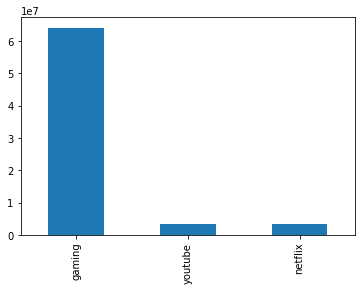

In [78]:
# Top 3 most used applications

data_with_clusters[['youtube','gaming','email','netflix','social']].sum().sort_values(ascending = False).head(3).plot(kind='bar')

In [79]:
# calculating the most appropriate k value

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalised_df)
    Sum_of_squared_distances.append(km.inertia_)

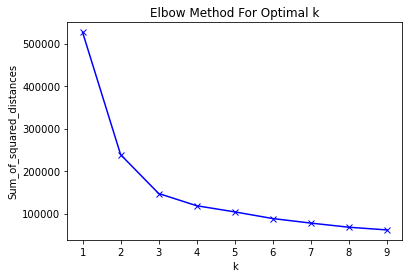

In [80]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

3 is indeed the optimum k value.

In [ ]:
# Saving new dataframe with engagement score.

save_data_path = os.path.join(parent_dir,"data","teleco_user_engagement_data.csv") # setting path to data directory
data_with_clusters.to_csv(save_data_path, index=False)